The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.

In [38]:
import pandas as pd
import seaborn as sns
%matplotlib inline

Import three datasets

In [39]:
movies = pd.read_csv('movies.dat', header = None, sep='::', engine='python', encoding='ISO-8859-1', names=['MovieID', 'Title', 'Genres'])
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [40]:
ratings = pd.read_csv('ratings.dat', header = None, sep='::', engine='python', encoding='ISO-8859-1', names=['UserID','MovieID', 'Rating', 'TimeStamp'])

In [41]:
users = pd.read_csv('users.dat', header = None, sep='::', engine='python', encoding='ISO-8859-1', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])

Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

In [42]:
Master_Data_Temp = pd.merge(movies, ratings, on='MovieID')

In [43]:
Master_Data = pd.merge(Master_Data_Temp, users, on=['UserID'])
Master_Data.drop(['Genres', 'TimeStamp', 'Zip-code'], axis=1,inplace=True)
Master_Data.head()

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),1,5,F,1,10
1,48,Pocahontas (1995),1,5,F,1,10
2,150,Apollo 13 (1995),1,5,F,1,10
3,260,Star Wars: Episode IV - A New Hope (1977),1,4,F,1,10
4,527,Schindler's List (1993),1,5,F,1,10


Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
User Age Distribution
User rating of the movie “Toy Story”
Top 25 movies by viewership rating
Find the ratings for all the movies reviewed by for a particular user of user id = 2696

<AxesSubplot:xlabel='Age', ylabel='Frequency'>

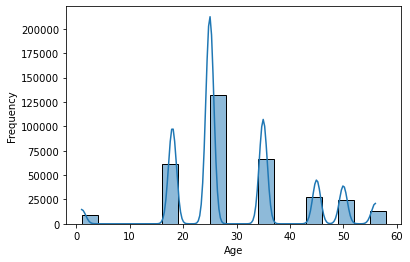

In [44]:
#For numerical data (User Age Distribution) we can draw histplot
sns.histplot(data=Master_Data, x='Age', binwidth=3, kde=True,stat='frequency')

<AxesSubplot:xlabel='Rating', ylabel='Title'>

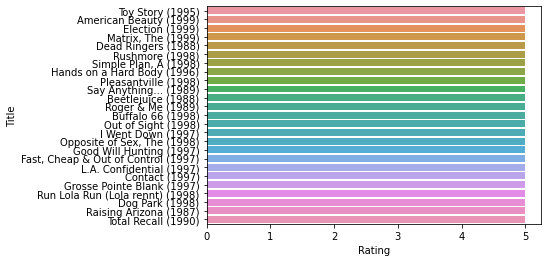

In [45]:
#For top 25 movies & user rating of ToyStory
sns.barplot(x='Rating', y = 'Title', data = Master_Data.sort_values('Rating', ascending=False).head(25))

In [46]:
#Find the ratings for all the movies reviewed by for a particular user of user id = 2696
userid_2696 = Master_Data['UserID'] == 2696
Master_Data[userid_2696]

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
991035,350,"Client, The (1994)",2696,3,M,25,7
991036,800,Lone Star (1996),2696,5,M,25,7
991037,1092,Basic Instinct (1992),2696,4,M,25,7
991038,1097,E.T. the Extra-Terrestrial (1982),2696,3,M,25,7
991039,1258,"Shining, The (1980)",2696,4,M,25,7
991040,1270,Back to the Future (1985),2696,2,M,25,7
991041,1589,Cop Land (1997),2696,3,M,25,7
991042,1617,L.A. Confidential (1997),2696,4,M,25,7
991043,1625,"Game, The (1997)",2696,4,M,25,7
991044,1644,I Know What You Did Last Summer (1997),2696,2,M,25,7


Feature Engineering:
Use column genres:
Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.
Determine the features affecting the ratings of any particular movie.
Develop an appropriate model to predict the movie ratings

In [47]:
unique_genres = Master_Data_Temp['Genres'].unique()
unique_genres

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", "Children's|Comedy",
       'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventure|Crime', 'Crime', 'Drama

In [48]:
one_hot_encoding = pd.get_dummies(movies.Genres, )
df = pd.concat([movies['Title'],one_hot_encoding], axis=1)
df.head()

,Title,Action,Action|Adventure,Action|Adventure|Animation,Action|Adventure|Animation|Children's|Fantasy,Action|Adventure|Animation|Horror|Sci-Fi,Action|Adventure|Children's,Action|Adventure|Children's|Comedy,Action|Adventure|Children's|Fantasy,Action|Adventure|Children's|Sci-Fi,...,Romance|Thriller,Romance|War,Romance|Western,Sci-Fi,Sci-Fi|Thriller,Sci-Fi|Thriller|War,Sci-Fi|War,Thriller,War,Western
0,Toy Story (1995),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Jumanji (1995),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Grumpier Old Men (1995),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Waiting to Exhale (1995),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Father of the Bride Part II (1995),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
